In [57]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 
import Waveform_Analysis.PMT_POSITIONS as pmtpos

#filepath = "/mnt/data/eos/simulations/muon_directionality/muon_directionality_test.root"
#filepath = "/mnt/data/eos/simulations/muons_random_angles_1m/muon_random_angle_1m.root"
#filepath = "/home/mpearson5/Eos_env/MuonExperiment/macros/output.ntuple.root"
#filepath = "/home/mpearson5/Eos_env/EosSimulations/macros/output.ntuple.root"
#filepath = "/mnt/data/eos/simulations/eos_ambe_10k/eos_ambe_10k_water_0.root"

filepath = "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root"
RealWorldData = "/mnt/data/eos/run496/run496.root"
muonChannels = [254, 252, 253, 238, 237, 236]
#muonPMTs = [0,1,2,3]

muonMapping = {
    254: (15, 14),
    252: (15, 12),
    253: (15,13),
    238: (14, 14),
    237: (14, 13),
    236: (14, 12), #
}

muonTopTop = [252,254]
muonTop = [253,238]
muonBottom = [237,236]

# rootFile = ROOT.TFile.Open(filepath, "read")
# eventTree = rootFile.Get("output")
# metaTree = rootFile.Get("meta")
# metaTree.Print()

# total_events = int(eventTree.GetEntries())
# total_meta = int(metaTree.GetEntries())
# print(total_meta)
# #metaInfo = metaTree.GetEntry(1)
# print(metaInfo)

# i = 0
# pmtIds = []
# while i < total_meta:
#     pmtIds.append(metaTree.GetEntry(i).pmtId.GetValue())
#     i += 1

# for event in metaTree:
#     print(event)

# pmtIds = metaTree.pmtId
# pmtChannels = metaInfo.pmtChannel
# print(total_events)

realData = ROOT.RDataFrame("events", RealWorldData)
realnhits = realData.AsNumpy(columns=["nhit"])["nhit"]
reallcns = realData.AsNumpy(columns=["lcn"])["lcn"]


data = ROOT.RDataFrame("output", filepath)
meta = ROOT.RDataFrame("meta", filepath)
nhits = data.AsNumpy(columns=["nhits"])["nhits"]
hitsPMTs = data.AsNumpy(columns=["hitPMTID"])["hitPMTID"]
mchitPMT = data.AsNumpy(columns=["mcPMTID"])["mcPMTID"]
pmtId = meta.AsNumpy(columns=["pmtId"])["pmtId"]
pmtChannel = meta.AsNumpy(columns=["pmtChannel"])["pmtChannel"]
mcke = data.AsNumpy(columns=["mcke"])["mcke"]
charge = data.AsNumpy(columns=["hitPMTCharge"])["hitPMTCharge"]
triggerTime = data.AsNumpy(columns=["triggerTime"])["triggerTime"]
trackingPosX = data.AsNumpy(columns=["trackPosX"])["trackPosX"]
trackingPosY = data.AsNumpy(columns=["trackPosY"])["trackPosY"]
trackingPosZ = data.AsNumpy(columns=["trackPosZ"])["trackPosZ"]
trackingParticle = data.AsNumpy(columns=["trackPDG"])["trackPDG"]
#charges = data.AsNumpy(columns=["charge"])["charge"]
#lcns = data.AsNumpy(columns=["lcn"])["lcn"]

pmt_map = dict(zip(pmtId[1], pmtChannel[1]))
#print(pmtId)
#print(pmtIds)
print("Done loading")

Done loading


Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [42]:
print(pmt_map)
print(PMT_POSITIONS.x)

{0: 253, 1: 254, 2: 236, 3: 238, 4: 237, 5: 252, 6: 224, 7: 112, 8: 225, 9: 226, 10: 113, 11: 227, 12: 228, 13: 114, 14: 229, 15: 230, 16: 231, 17: 115, 18: 232, 19: 233, 20: 116, 21: 234, 22: 117, 23: 235, 24: 240, 25: 118, 26: 241, 27: 242, 28: 243, 29: 244, 30: 119, 31: 245, 32: 246, 33: 120, 34: 121, 35: 247, 36: 248, 37: 122, 38: 249, 39: 250, 40: 123, 41: 251, 42: 256, 43: 257, 44: 258, 45: 259, 46: 260, 47: 261, 48: 262, 49: 263, 50: 264, 51: 265, 52: 266, 53: 267, 54: 268, 55: 0, 56: 1, 57: 2, 58: 3, 59: 4, 60: 5, 61: 6, 62: 7, 63: 8, 64: 9, 65: 10, 66: 11, 67: 12, 68: 13, 69: 14, 70: 184, 71: 16, 72: 17, 73: 18, 74: 19, 75: 20, 76: 21, 77: 22, 78: 23, 79: 24, 80: 25, 81: 26, 82: 27, 83: 28, 84: 29, 85: 30, 86: 185, 87: 32, 88: 33, 89: 34, 90: 35, 91: 36, 92: 37, 93: 38, 94: 39, 95: 40, 96: 41, 97: 42, 98: 43, 99: 44, 100: 45, 101: 46, 102: 186, 103: 48, 104: 49, 105: 50, 106: 51, 107: 52, 108: 53, 109: 54, 110: 55, 111: 56, 112: 57, 113: 58, 114: 59, 115: 60, 116: 61, 117: 62,

NameError: name 'PMT_POSITIONS' is not defined

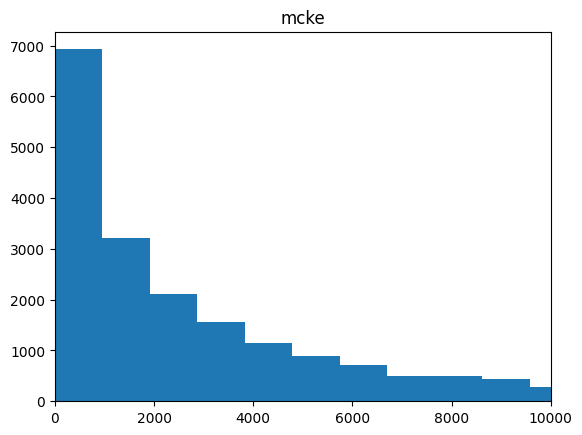

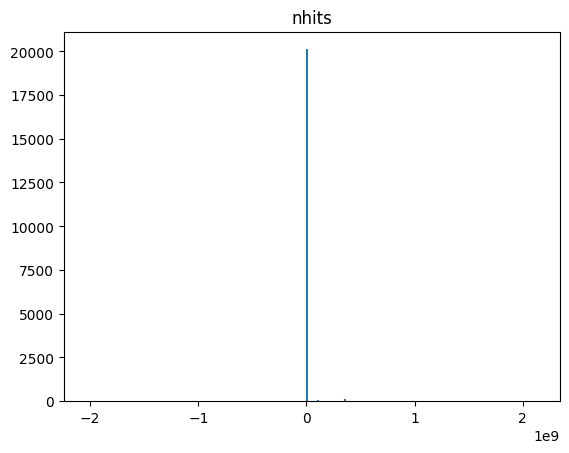

In [7]:
plt.hist(mcke, bins=1000)
plt.title("mcke")
plt.xlim([0,10000])
plt.show()

plt.hist(nhits, bins=250)
#plt.xlim([0,250])
plt.title("nhits")
plt.show()

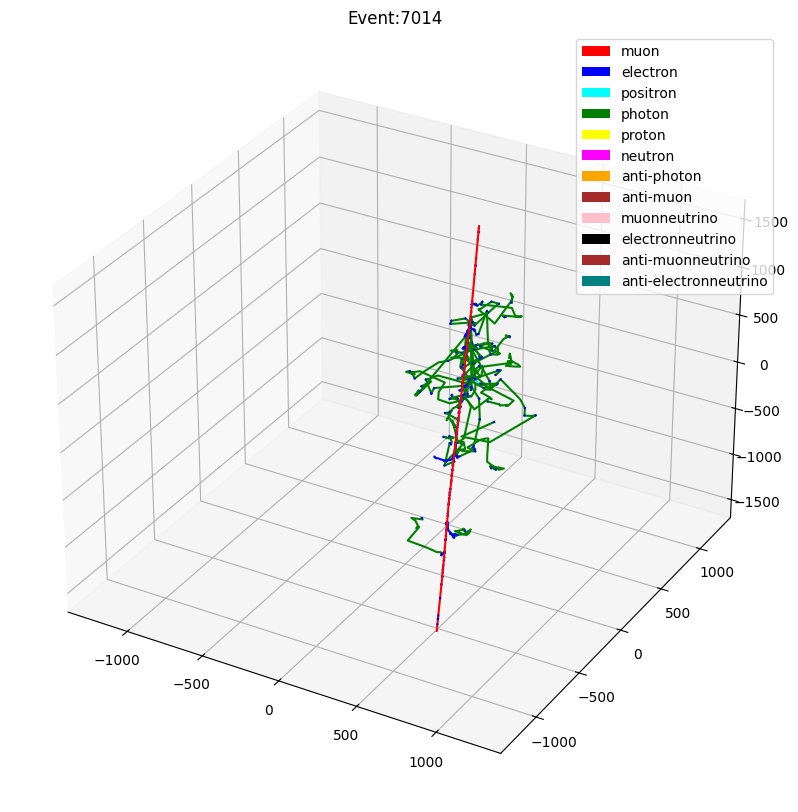

2033.5163519845808MeV


IndexError: list index out of range

In [17]:
# Plots the tracks of the particles from the simulation

#df = ROOT.RDataFrame("output", "eos_ambe_1k_water.root")

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

#event 6
event = 7014

display = {
    "top":False,
    "brl":True,
    "bottom":False,
    "dic": True
}

for charge, lcn in zip(charges[event], lcns[event]):
    try:
        pmtCharges[lcn] = charge
    except IndexError:
        pass
# Normalize the colors based on charge
norm = matplotlib.colors.Normalize(vmin=0, vmax=(np.max(pmtCharges)))

for x,y,z, charge in zip(pmtpos.x,pmtpos.y,pmtpos.z, pmtCharges):
    if x == -1:
        continue
    if (z > 900) and display["top"]:
        axes.scatter(x,y,z,marker='o',c=(charge), norm=norm)
        continue
    if (900 > z > -700) and display["brl"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue
    if (-1300<z<-700) and display["bottom"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue
    if (z<-1300) and display["dic"]:
        axes.scatter(x,y,z, marker='o', c=(charge), norm=norm)
        continue

#print(trackingPosX[0])
#print(tackingParticle[event])

particles = {
    -22:"anti-photon",
    11:"electron",
    -11:"positron",
    22:"photon",
    13:"muon",
    -13:"anti-muon",
    2212:"proton",
    2112:"neutron",
    14:"muonneutrino",
    -14:"anti-muonneutrino",
    -12:"anti-electronneutrino",
    12:"electronneutrino",
}

colorPalette = {
    "muon": "red",
    "electron": "blue",
    "positron": "cyan",
    "photon": "green",
    "proton": "yellow",
    "neutron": "magenta",
    "anti-photon": "orange",
    "anti-muon": "brown",
    "muonneutrino":"pink",
    "electronneutrino": "black",
    "anti-muonneutrino": "brown",
    "anti-electronneutrino": "teal",
}

particlBlacklist = [""]

# Setting up lengend
# legendElements = []
# for particle in DisplayParticles:
#     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
legendElements = []
for index, particle in enumerate(colorPalette):
    #print(index, particle)
    legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))

plt.legend(handles=legendElements)
plt.title("Event:"+str(event))

for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
    try:
        if particles[vector[3]] in particlBlacklist:
            continue
    except KeyError:
        print("Missing particle:" + str(vector[3]))
        continue
        
    x = []
    y = []
    z = []
    for xcomponent in vector[0]:
        x.append(xcomponent)
    for ycomponent in vector[1]:
        y.append(ycomponent)
    for zcomponent in vector[2]:
        z.append(zcomponent)

    ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])

plt.show()
print(str(mcke[event]) + "MeV")
print("nhits:" + str(nhits[event]))
print("PMTCharge" + str(pmtCharge[event]))

# Plot ocupancy of muon paddles

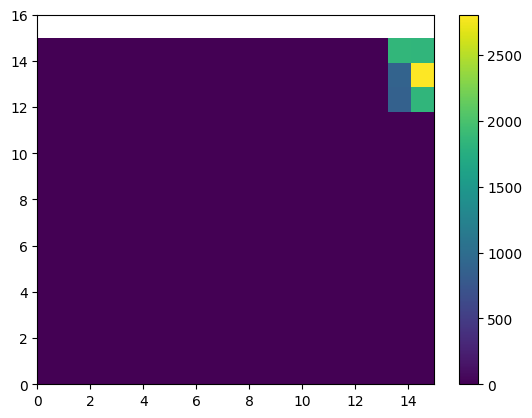

In [23]:
boards = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,0]
channels = [0,1,2,3,4,5,6,7,8,9,11,12,13,14,15]
hitPMTs = []

for event in range(len(triggerTime)):
    for channel in muonChannels:
        try:
            pmt = list(pmt_map.keys())[list(pmt_map.values()).index(channel)]
        except ValueError:
            pass
        if pmt in mchitPMT[event]:
            #print(pmt)
            boards.append(muonMapping[channel][0])
            channels.append(muonMapping[channel][1])

    #hitPMTs.append(pmt)
# print(boards)
# print(channels)

fig, ax = plt.subplots()
h = ax.hist2d(boards, channels, bins=[17,14])
ax.set_xlim([0,15])
ax.set_ylim([0,16])
fig.colorbar(h[3], ax=ax)

# plt.hist2d(boards, channels, bins=[17,14])
# plt.xlim([0,15])
# plt.ylim([0,16])
# axes = plt.gca()
# axes.set_xlabel("Channel")
# axes.set_ylabel("Board")
# plt.show()
# plt.hist(hitPMTs, bins=250)
plt.show()

# Detection of double events

{ 1, 2, 4, 6, 11, 12, 13, 16, 18, 19, 20, 21, 24, 26, 32, 34, 37, 38, 39, 45, 48, 53, 54, 55, 59, 60, 62, 64, 66, 67, 69, 70, 71, 74, 75, 77, 80, 81, 82, 87, 88, 90, 93, 94, 96, 98, 99, 100, 103, 104, 106, 110, 112, 115, 116, 120, 123, 128, 129, 130, 131, 132, 133, 134, 136, 137, 138, 139, 140, 141, 146, 148, 150, 151, 152, 153, 154, 155, 156, 158, 160, 161, 164, 165, 168, 170, 172, 173, 174, 180, 181, 183, 185, 186, 187, 188, 189, 190, 193, 196, 198, 201, 202, 203, 204, 205, 206, 209, 210, 214, 215, 217, 219, 225, 226, 227, 228, 229, 230, 232, 233, 234, 235, 237, 240, 241, 242, 243, 244, 245, 247, 249, 250, 258, 259, 261, 262, 265, 266, 267 }


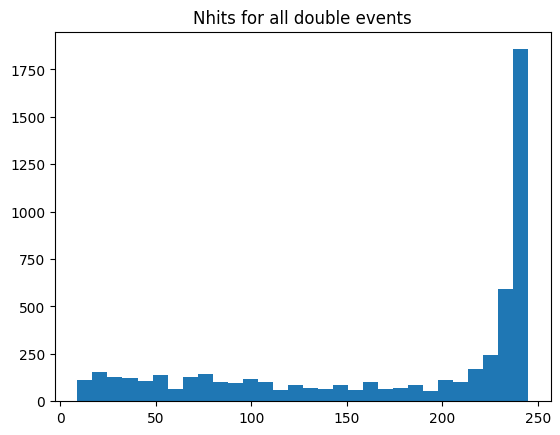

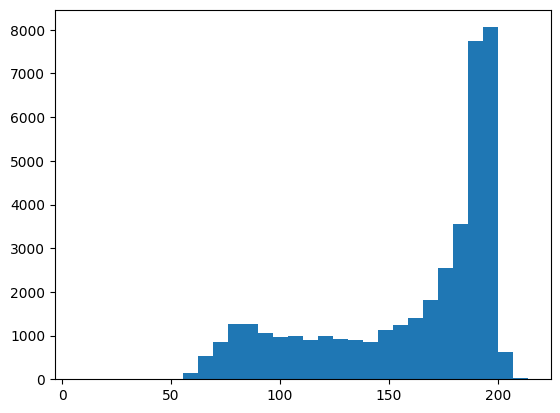

In [58]:
simdoubleEvents = []
simeventHits = []
realdoubleEvents = []
realeventHits = []

for event in range(len(triggerTime)):
    for toppmt in muonTopTop:
        for middlepmt in muonTop:
            try:
                pmttop = list(pmt_map.keys())[list(pmt_map.values()).index(toppmt)]
                pmtmiddle = list(pmt_map.keys())[list(pmt_map.values()).index(middlepmt)]
            except ValueError:
                pass
            
            if ((pmttop in hitsPMTs[event])) and ((pmtmiddle in hitsPMTs[event])):
                doubleEvents.append(event)
                eventHits.append(nhits[event])

print(lcns[0])

for event in range(len(lcns)):
    for toppmt in muonTopTop:
        for middlepmt in muonTop:
            if ((toppmt in lcns[event])) and ((middlepmt in lcns[event])):
                realdoubleEvents.append(event)
                realeventHits.append(realnhits[event])

print("Done processing events")
#print(doubleEvents)
plt.hist(eventHits, bins=30)
plt.title("Nhits for all double events")
plt.show()
plt.hist(realeventHits, bins=30)
plt.show()

In [1]:
# PMT x positions
x = [
-1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -969.7055,
-969.7055, -969.7055, -969.7055, -969.7055, -969.7055, -969.7055, -832.705, -1.0, # CAEN0
-832.705, -832.705, -832.705, -832.705, -832.705, -638.957, -638.957, -638.957,
-638.957, -638.957, -638.957, -638.957, -401.6652, -401.6652, -401.6652, -1.0, # CAEN1
-401.6652, -401.6652, -401.6652, -137.0005, -137.0005, -137.0005, -137.0005, -137.0005,
-137.0005, -137.0005, 137.0005, 137.0005, 137.0005, 137.0005, 137.0005, -1.0, # CAEN2
137.0005, 401.6652, 401.6652, 401.6652, 401.6652, 401.6652, 401.6652, 401.6652,
638.957, 638.957, 638.957, 638.957, 638.957, 638.957, 638.957, -1.0, # CAEN3
832.705, 832.705, 832.705, 832.705, 832.705, 832.705, 969.7055, 969.7055,
969.7055, 969.7055, 969.7055, 969.7055, 969.7055, 1040.6222, 1040.6222, -1.0, # CAEN4
1040.6222, 1040.6222, 1040.6222, 1040.6222, 1040.6222, 1040.6222, 1040.6222, 1040.6222,
1040.6222, 1040.6222, 1040.6222, 969.7055, 969.7055, 969.7055, 969.7055, -1.0, # CAEN5
969.7055, 969.7055, 832.705, 832.705, 832.705, 832.705, 832.705, 832.705,
832.705, 638.957, 638.957, 638.957, 638.957, 638.957, 638.957, -1.0, # CAEN6
-736.027, -477.826, -494.17, -251.439, -234.989, 0.0, 0.0, 238.203,
477.826, 468.157, 452.673, 697.283, -1.0, -1.0, -1.0, -1.0, # CAEN7
401.6652, 401.6652, 401.6652, 401.6652, 401.6652, 401.6652, 401.6652, 137.0005,
137.0005, 137.0005, 137.0005, 137.0005, 137.0005, 137.0005, -137.0005, -1.0, # CAEN8
-137.0005, -137.0005, -137.0005, -137.0005, -137.0005, -401.6652, -401.6652, -401.6652,
-401.6652, -401.6652, -401.6652, -401.6652, -638.957, -638.957, -638.957, -1.0, # CAEN9
-638.957, -638.957, -638.957, -832.705, -832.705, -832.705, -832.705, -832.705,
-832.705, -832.705, -969.7055, -969.7055, -969.7055, -969.7055, -969.7055, -1.0, # CAEN10
-969.7055, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222, -1040.6222,
-832.705, -401.6652, 137.0005, 832.705, 1040.6222, 969.7055, 638.957, -1.0, # CAEN11
0.0, 0.0, 0.0, 0.0, -285.5184014, -302.33780102, -310.86443885, -310.86443885,
-302.33780102, -285.5184014, -607.94853693, -616.40212121, -137.0005, -638.957, -969.7055, -1.0, # CAEN12
-607.94853693, -582.81965578, 285.5184014, 302.33780102, 310.86443885, 310.86443885, 302.33780102, 285.5184014,
582.81965578, 607.94853693, 616.40212121, 607.94853693, -1.0, -1.0, -1.0, -1.0, # CAEN13
-681.965, -697.283, -681.965, -468.157, -473.357, -452.673, -222.619, -232.97,
-238.203, -232.97, 0.0, 0.0, -1.0, -1.0, -1.0, -1.0, # CAEN14
0.0, 0.0, 222.619, 232.97, 251.439, 232.97, 234.989, 473.357,
494.17, 681.965, 736.027, 681.965, -1.0, -1.0, -1.0, -1.0, # CAEN15
-585.084, -591.582, -291.157, -297.697, -291.157, 0.0, 0.0, 278.221,
291.157, 297.697, 291.157, 585.084 # CAEN16
]

pmtMask = []

for id, value in enumerate(x):
    if value == -1:
        pmtMask.append(id)

print(pmtMask)

[15, 31, 47, 63, 79, 95, 111, 124, 125, 126, 127, 143, 159, 175, 191, 207, 220, 221, 222, 223, 236, 237, 238, 239, 252, 253, 254, 255]


In [22]:
pmtMask = [15, 31, 47, 63, 79, 95, 111, 124, 125, 126, 127, 143, 159, 175, 191, 207, 220, 221, 222, 223, 236, 237, 238, 239, 252, 253, 254, 255, 303,304,305,306,307,308,254,309,252,310,312,313,314,315,316,317,318,319,320,303,304,305,306,307,308,254,309,252,310,312,313,314,315,316,317,318,319,320,340,341,342,343,344,345,346,347,348,349,350,351,237,352,236,353,354,355,356,357,358,359]

def correct_nhits(nhits:[])->[]:

    corrected_nhits = [pmtid for pmtid in nhits if pmtid not in pmtMask]
    return corrected_nhits

def calculate_nhits(hitPMTS:[])->[]:

    corrected_nhits = correct_nhits(hitPMTS)
    return len(corrected_nhits)


# Process Data

In [36]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 
import Waveform_Analysis.PMT_POSITIONS as pmtpos
from ipywidgets import IntProgress
from IPython.display import display
from multiprocessing import Pool
import numpy as np
import tqdm

#simulationData = "/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root"
#simulationData = "/mnt/data/eos/simulations/eos_efficiency_test/eos_1nhit/eos_1nhit_0.root"
#simulationData = "/mnt/data/simulations/eos_sky_10k_all_muon_paddles/eos_sky_10k_all_muon_paddles_0.root"
simulationData = "/mnt/data/eos/simulations/eos_sky_1m_muon_paddles/eos_sky_1m_top_bottom_muon_paddles.root"
realWorldData = "/mnt/data/eos/run417/run417.root"

realData = ROOT.RDataFrame("events", realWorldData)
simData = ROOT.RDataFrame("output", simulationData)
simMeta = ROOT.RDataFrame("meta", simulationData)

cores = 100 #Number of cores used to run the analysis

muonChannels = [254, 252, 253, 238, 237, 236] #LCNs for each muon paddle
muonMapping = { # Mapps the LCNs to the board and channel
    254: (15, 14), 
    252: (15, 12),
    253: (15, 13),
    238: (14, 14),
    237: (14, 13),
    236: (14, 12),
}
#muonTopTop = [252,254]
muonTopTop = [303,304,305,306,307,308,254,309,252,310,312,313,314,315,316,317,318,319,320]
muonTop = [321,322,324,325,326,327,328,329,330,253,331,239,332,333,335,335,336,337,338,339]
#muonBottom = [237,236]
muonBottom = [340,341,342,343,344,345,346,347,348,349,350,351,237,352,236,353,354,355,356,357,358,359]
#muonTopTop = [252,254,303,304]
#muonTop = [253, 239]
# muonTopTop = [303,304]
# muonBottom = [340,341]
# muo
#muonBottom = [237,236,340,341,348]

realNhits = realData.AsNumpy(columns=["nhit"])["nhit"]
realLcns = realData.AsNumpy(columns=["lcn"])["lcn"]
realEventNumber = realData.AsNumpy(columns=["event_number"])["event_number"]
realTotalCharge = realData.AsNumpy(columns=["total_charge"])["total_charge"]

simNhits = simData.AsNumpy(columns=["nhits"])["nhits"]
simPmtId = simMeta.AsNumpy(columns=["pmtId"])["pmtId"]
simHitsPMTs = simData.AsNumpy(columns=["hitPMTID"])["hitPMTID"]
simPmtChannel = simMeta.AsNumpy(columns=["pmtChannel"])["pmtChannel"]
simCharge = simData.AsNumpy(columns=["hitPMTCharge"])["hitPMTCharge"]

pmt_map = dict(zip(simPmtId[1], simPmtChannel[1]))

simSingleEvents = []
simSingleEventHits = []

simSingleEventHitPMTS = []

simDoubleEvents = []
simTripleEvents = []
simEventHits = []
simTripleEventHits = []
simDoubleEventCharge = []
simDoubleEventCharges = []
simTripleEventCharge = []
simTripleEventCharges = []
realDoubleEvents = []
realEventHits = []

print("Processing simulation data")
total_sim = len(simNhits)

f = IntProgress(min=0, max=total_sim) # instantiate the bar
display(f) # display the bar

# count = 0
# for event in range(total_sim): 
#     count += 1
#     if count == 100:
#         f.value += 100
#         count = 0
    
#     for toppmt in muonTopTop:
#         for middlepmt in muonTop:
#             try:
#                 pmttop = list(pmt_map.keys())[list(pmt_map.values()).index(toppmt)]
#                 pmtmiddle = list(pmt_map.keys())[list(pmt_map.values()).index(middlepmt)]
#             except ValueError:
#                 pass
            
#             if ((pmttop in simHitsPMTs[event])) and ((pmtmiddle in simHitsPMTs[event])):
#                 simDoubleEvents.append(event)
#                 simEventHits.append(simNhits[event])

#                 total = 0
#                 for charge in simCharge[event]:
#                     total += charge

#                 simTripleEventCharge.append(total)
#                 simDoubleEventCharges.append(simCharge[event])

#             for bottompmt in muonBottom:
#                 try:
#                     pmtbottom = list(pmt_map.keys())[list(pmt_map.values()).index(bottompmt)]
#                 except ValueError:
#                     pass

#                 if ((pmttop in simHitsPMTs[event])) and ((pmtmiddle in simHitsPMTs[event])) and ((pmtbottom in simHitsPMTs[event])):
#                     simTripleEvents.append((event,[toppmt,middlepmt,bottompmt]))
#                     simTripleEventHits.append(simNhits[event])

#                     total = 0
#                     for charge in simCharge[event]:
#                         total += charge

#                     simTripleEventCharge.append(total)
#                     simTripleEventCharges.append(simCharge[event])

def processes_simulation_events(events:list):

    tmpData = [[],[],[],[],[],[],[]]
    
    for event in events:
        for toppmt in muonTopTop:

            try:
                pmttop = list(pmt_map.keys())[list(pmt_map.values()).index(toppmt)]
            except ValueError:
                continue

            if ((pmttop in simHitsPMTs[event])):
                tmpData[4].append((event, pmttop))
                #tmpData[5].append(simNhits[event])
                tmpData[5].append(calculate_nhits(simHitsPMTs[event]))
                tmpData[6].append(simHitsPMTs[event])
            
            for middlepmt in muonTop:
                try:
                    pmtmiddle = list(pmt_map.keys())[list(pmt_map.values()).index(middlepmt)]
                except ValueError:
                    continue

                if ((pmttop in simHitsPMTs[event])) and ((pmtmiddle in simHitsPMTs[event])):
                    tmpData[0].append(event)
                    tmpData[1].append(calculate_nhits(simHitsPMTs[event]))

                for bottompmt in muonBottom:
                    try:
                        pmtbottom = list(pmt_map.keys())[list(pmt_map.values()).index(bottompmt)]
                    except ValueError:
                        continue

                    if ((pmttop in simHitsPMTs[event])) and ((pmtmiddle in simHitsPMTs[event])) and ((pmtbottom in simHitsPMTs[event])):
                        tmpData[2].append((event,[toppmt, middlepmt, bottompmt]))
                        tmpData[3].append(calculate_nhits(simHitsPMTs[event]))
                        #tmpData[3].append(simNhits[event])
    return tmpData

parameters = np.array_split(range(total_sim), cores)
print("Processing simulation")
simOutput = []

with Pool(cores) as p:
    simOutput.append(p.map(processes_simulation_events, parameters))

for core in simOutput:
    for event in core:
        for value in event[0]:
            simDoubleEvents.append(value)
        for value in event[1]:
            simEventHits.append(value)
        for value in event[2]:
            simTripleEvents.append(value)
        for value in event[3]:
            simTripleEventHits.append(value)
        for value in event[4]:
            simSingleEvents.append(value)
        for value in event[5]:
            simSingleEventHits.append(value)
        for value in event[6]:
            simSingleEventHitPMTS.append(value)

print("Processing real data")
totalReal = len(realEventNumber)
realProgress = IntProgress(min=0, max=totalReal)
display(realProgress)

def process_realData(arange):
    print("Starting processing", arange)
    tmpData = [[],[],[]]

    for event in arange:
        for toppmt in muonTopTop:
            for middlepmt in muonTop:
                if ((toppmt in realLcns[event])) and ((middlepmt in realLcns[event])):
                    tmpData[0].append(event)
                    tmpData[1].append(realNhits[event])
                    tmpData[2].append(realTotalCharge[event])

    return tmpData

outputData=[]

parameters = np.array_split(realEventNumber, cores)
print(parameters)
with Pool(cores) as p:
    outputData.append(p.map(process_realData, parameters))

realEvents = []
realEventHits = []
realEventCharge = []
for core in outputData:
    for event in core:
        for value in event[0]:
            realEvents.append(value)
        for value in event[1]:
            realEventHits.append(value)
        for value in event[2]:
            realEventCharge.append(value)


# count = 0
# for event in range(totalReal):
#     count += 1
#     if count == 100:
#         realProgress.value += 100
#         count =0

#     for toppmt in muonTopTop:
#         for middlepmt in muonTop:
#             if ((toppmt in realLcns[event])) and ((middlepmt in realLcns[event])):
#                 realDoubleEvents.append(event)
#                 realEventHits.append(realNhits[event])roo

print("Simulation: Total Events=" + str(len(simNhits)) + " Total Doubles=" + str(len(simDoubleEvents)) + " Total Triples=" + str(len(simTripleEvents)))
print("Data: Total Events=" + str(totalReal) + " Total Doubles=" + str(len(realDoubleEvents)))

Processing simulation data


IntProgress(value=0, max=169043)

Processing simulation
Processing real data


IntProgress(value=0, max=4952309)

[ndarray([ 1,  2,  3, ..., 27, 28, 29], dtype=int32), ndarray([30, 31, 32, ..., 82, 83, 84], dtype=int32), ndarray([ 85,  86,  87, ..., 141, 142, 143], dtype=int32), ndarray([144, 145, 146, ..., 197, 198, 199], dtype=int32), ndarray([200, 201, 202, ..., 177, 178, 179], dtype=int32), ndarray([180, 181, 182, ..., 270, 271, 272], dtype=int32), ndarray([273, 274, 275, ..., 325, 326, 327], dtype=int32), ndarray([328, 329, 330, ..., 335, 336, 337], dtype=int32), ndarray([338, 339, 340, ..., 366, 367, 368], dtype=int32), ndarray([369, 370, 371, ..., 392, 393, 394], dtype=int32), ndarray([395, 396, 397, ..., 382, 383, 384], dtype=int32), ndarray([385, 386, 387, ..., 461, 462, 463], dtype=int32), ndarray([464, 465, 466, ..., 461, 462, 463], dtype=int32), ndarray([464, 465, 466, ..., 438, 439, 440], dtype=int32), ndarray([441, 442, 443, ..., 457, 458, 459], dtype=int32), ndarray([460, 461, 462, ..., 499, 500, 501], dtype=int32), ndarray([502, 503, 504, ..., 570, 571, 572], dtype=int32), ndarray(

In [28]:
print(simTripleEventHits)2

[241, 241, 243, 243, 241, 244, 242, 238, 245, 240, 240, 242, 241, 242, 245, 244, 243, 243, 240, 241, 244]


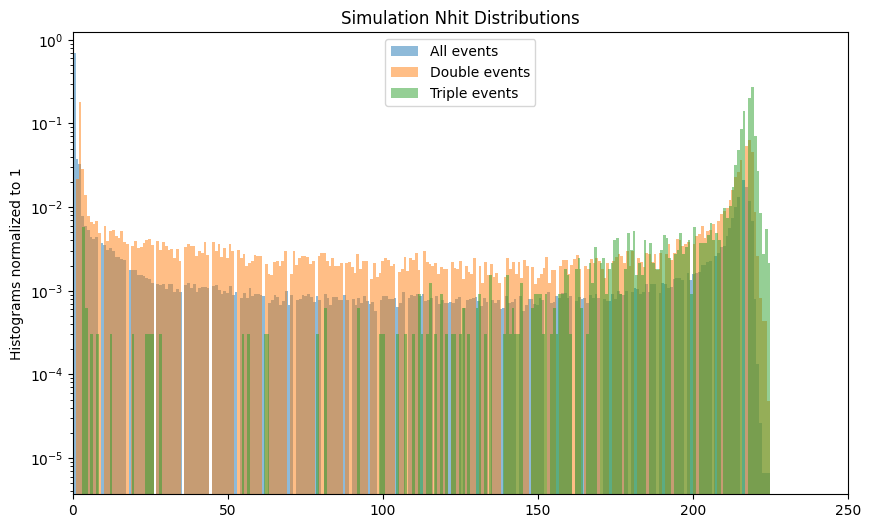

In [39]:
plt.figure(figsize=(10,6))
#plt.hist(list(filter(lambda x: 0<x<250, simNhits)), bins=250, density=True, alpha=0.5, label="All events (Unprocessed)")
plt.hist(list(map(lambda hits: calculate_nhits(hits), simHitsPMTs)), bins=250, density=True, alpha=0.5, label="All events")
#plt.hist(simSingleEventHits, bins=249, density=True, alpha=0.5, label="Singles")
plt.hist(simEventHits, bins=250, density=True, alpha=0.5, label="Double events")
plt.title("Simulation Nhit Distributions")
#plt.hist(list(map(lambda x: x if 0<x<250 else None, simNhits)), bins=30)
plt.hist(simTripleEventHits, density=True, alpha=0.5, label="Triple events", bins=250)
plt.xlim([0,250])
plt.yscale("log")
plt.ylabel("Histograms normalized to 1")
plt.legend()
plt.show()

# plt.hist((simEventHits,list(filter(lambda x: 0<x<250, simNhits)),simTripleEventHits), bins=10, norm=True)
# plt.xlim([0,250])
# plt.show()

NameError: name 'trackingPosX' is not defined

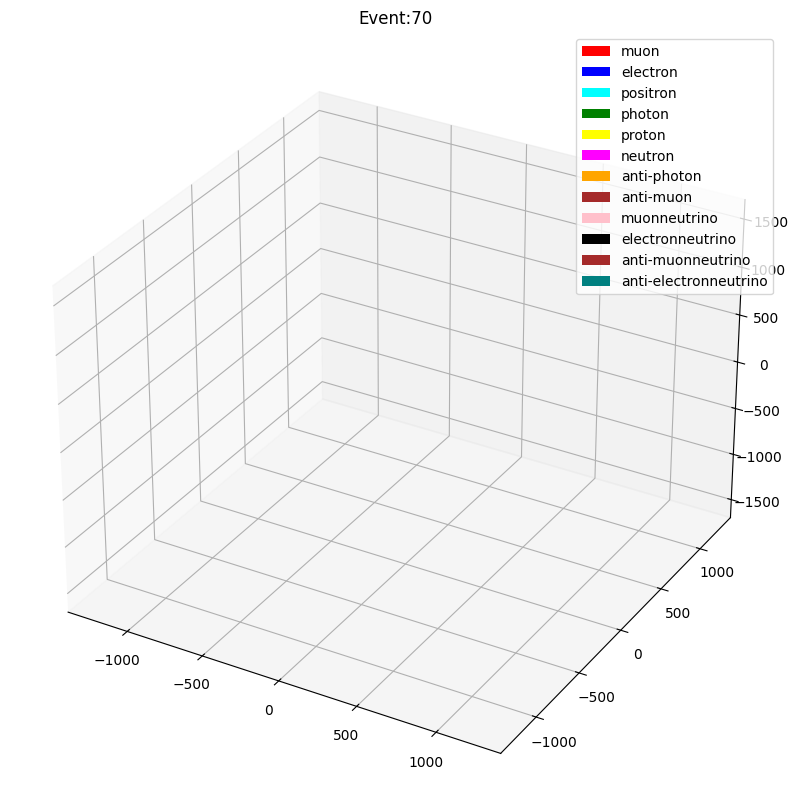

In [85]:

def plotEvent(ax, event):
    #event 6
    
    #print(trackingPosX[0])
    #print(tackingParticle[event])
    
    particles = {
        -22:"anti-photon",
        11:"electron",
        -11:"positron",
        22:"photon",
        13:"muon",
        -13:"anti-muon",
        2212:"proton",
        2112:"neutron",
        14:"muonneutrino",
        -14:"anti-muonneutrino",
        -12:"anti-electronneutrino",
        12:"electronneutrino",
    }
    
    colorPalette = {
        "muon": "red",
        "electron": "blue",
        "positron": "cyan",
        "photon": "green",
        "proton": "yellow",
        "neutron": "magenta",
        "anti-photon": "orange",
        "anti-muon": "brown",
        "muonneutrino":"pink",
        "electronneutrino": "black",
        "anti-muonneutrino": "brown",
        "anti-electronneutrino": "teal",
    }
    
    particlBlacklist = ["anti-photon", "electron", "photon","anti-muonneutrino"]
    
    # Setting up lengend
    # legendElements = []
    # for particle in DisplayParticles:
    #     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    legendElements = []
    for index, particle in enumerate(colorPalette):
        #print(index, particle)
        legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    
    plt.legend(handles=legendElements)
    plt.title("Event:"+str(event))
    
    for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
        try:
            if particles[vector[3]] in particlBlacklist:
                continue
        except KeyError:
            print("Missing particle:" + str(vector[3]))
            continue
            
        x = []
        y = []
        z = []
        for xcomponent in vector[0]:
            x.append(xcomponent)
        for ycomponent in vector[1]:
            y.append(ycomponent)
        for zcomponent in vector[2]:
            z.append(zcomponent)
    
        ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

for event in simDoubleEvents:
    plotEvent(ax, event)
plt.show()

In [5]:
print(len(trackingParticle[163]))
print(trackingPosX[163][189], trackingParticle[163][189])

190
{ 436.16186, 465.38514, 476.02297, 479.36336, 479.43269, 479.50203, 481.06195, 481.06888, 481.09661, 481.78034, 482.46503, 482.62340, 482.65123, 482.65819, 491.39009, 491.76301, 491.87827, 491.94787, 492.01740, 493.40812, 493.47765, 493.54718, 495.11350, 495.11906, 495.14689, 495.83302, 496.51984, 496.67820, 496.70603, 496.71159, 505.93151, 506.00108, 506.07077, 526.38656, 547.79274, 549.69567, 549.78265, 550.57868, 551.33191, 552.08568, 552.84089, 552.86143, 553.61776, 554.37454, 554.66325, 555.42303, 556.18259, 556.94239, 557.69989, 558.45530, 559.20882, 559.96135, 560.21142, 560.96422, 561.71849, 562.47153, 563.22393, 563.97645, 564.72816, 565.27991, 566.03437, 566.07021, 566.82278, 567.57692, 568.33091, 569.08536, 569.83869, 570.59095, 570.96880, 571.72131, 572.47216, 573.22534, 573.70434, 573.84256, 574.59550, 575.34852, 576.10156, 576.85625, 577.60926, 578.36100, 578.37264, 579.12212, 579.57551, 580.32204, 581.06554, 581.80412, 582.54061, 583.27919, 584.01750, 584.30049, 584.

# Detection of tripple events

In [11]:
# pmt1 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]
# pmt2 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]
# pmt3 = list(pmt_map.keys())[list(pmt_map.values()).index(tripple[0])]

tripleEvents = []
#print(pmt_map)

for event in range(len(triggerTime)):
    for toppmt in muonTopTop:
        for middlepmt in muonTop:
            for bottompmt in muonBottom:
                try:
                    pmttop = list(pmt_map.keys())[list(pmt_map.values()).index(toppmt)]
                    pmtmiddle = list(pmt_map.keys())[list(pmt_map.values()).index(middlepmt)]
                    pmtbottom = list(pmt_map.keys())[list(pmt_map.values()).index(bottompmt)]
                except ValueError:
                    pass

                if ((pmttop in hitsPMTs[event])) and ((pmtmiddle in hitsPMTs[event])) and ((pmtbottom in hitsPMTs[event])):
                    tripleEvents.append(event)
print(tripleEvents)

NameError: name 'triggerTime' is not defined

[0, 243, 241, 244, 241, 242, 241, 241, 241, 243, 243, 245, 245, 241, 243, 243, 238, 242, 242, 244, 242, 242, 244]


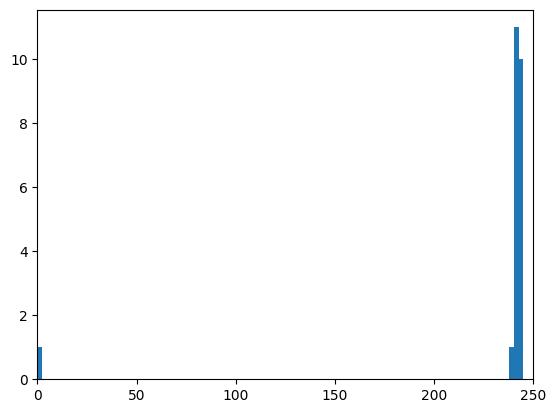

In [36]:
energies = []
tripleEventHits = [0]
for event in tripleEvents:
    energies.append(mcke[event])
    tripleEventHits.append(nhits[event])

print(tripleEventHits)

plt.hist(tripleEventHits, bins=100, )
plt.xlim([0,250])
plt.show()

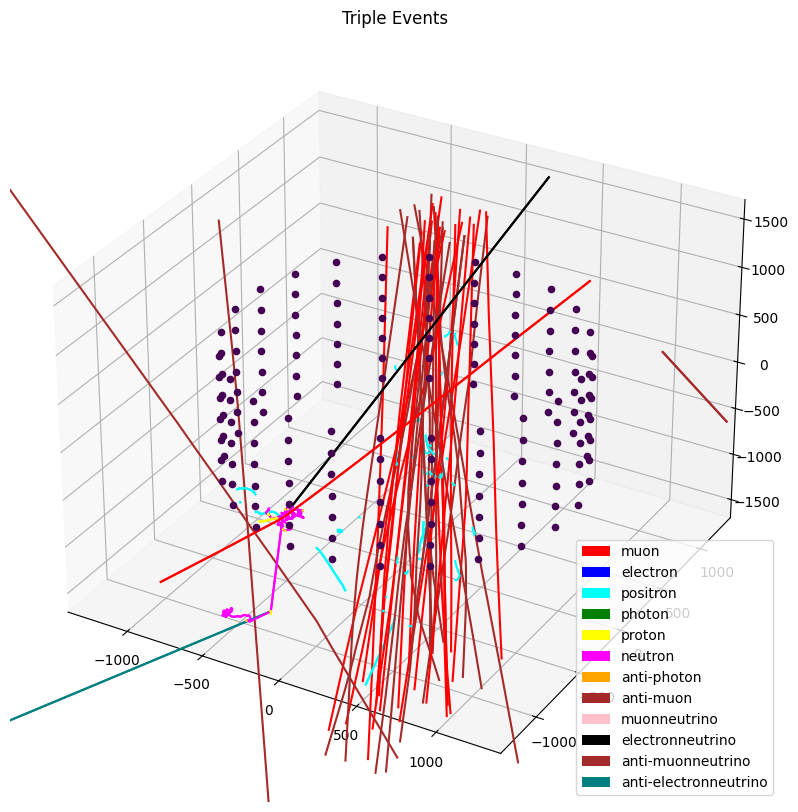

In [14]:

display = {
    "top":False,
    "brl":True,
    "bottom":False,
    "dic": False
}

trackingPosX = simData.AsNumpy(columns=["trackPosX"])["trackPosX"]
trackingPosY = simData.AsNumpy(columns=["trackPosY"])["trackPosY"]
trackingPosZ = simData.AsNumpy(columns=["trackPosZ"])["trackPosZ"]
trackingParticle = simData.AsNumpy(columns=["trackPDG"])["trackPDG"]

def plotEvent(ax, event):
    #event 6
    
    #print(trackingPosX[0])
    #print(tackingParticle[event])
    
    particles = {
        -22:"anti-photon",
        11:"electron",
        -11:"positron",
        22:"photon",
        13:"muon",
        -13:"anti-muon",
        2212:"proton",
        2112:"neutron",
        14:"muonneutrino",
        -14:"anti-muonneutrino",
        -12:"anti-electronneutrino",
        12:"electronneutrino",
    }
    
    colorPalette = {
        "muon": "red",
        "electron": "blue",
        "positron": "cyan",
        "photon": "green",
        "proton": "yellow",
        "neutron": "magenta",
        "anti-photon": "orange",
        "anti-muon": "brown",
        "muonneutrino":"pink",
        "electronneutrino": "black",
        "anti-muonneutrino": "brown",
        "anti-electronneutrino": "teal",
    }
    
    particlBlacklist = ["anti-photon", "electron", "photon","anti-muonneutrino"]
    
    # Setting up lengend
    # legendElements = []
    # for particle in DisplayParticles:
    #     legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    legendElements = []
    for index, particle in enumerate(colorPalette):
        #print(index, particle)
        legendElements.append(Patch(facecolor=colorPalette[particle], label=particle))
    
    plt.legend(handles=legendElements)
    plt.title("Triple Events")
    
    for vector in zip(trackingPosX[event], trackingPosY[event], trackingPosZ[event], trackingParticle[event]):
        try:
            if particles[vector[3]] in particlBlacklist:
                continue
        except KeyError:
            #print("Missing particle:" + str(vector[3]))
            continue
            
        x = []
        y = []
        z = []
        for xcomponent in vector[0]:
            x.append(xcomponent)
        for ycomponent in vector[1]:
            y.append(ycomponent)
        for zcomponent in vector[2]:
            z.append(zcomponent)
    
        ax.plot3D(x, y, z, colorPalette[particles[vector[3]]])mu

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])
ax.set_zlim([-1700,1700])

#norm = matplotlib.colors.Normalize(vmin=0, vmax=(np.max(pmtCharges)))

for x,y,z in zip(pmtpos.x,pmtpos.y,pmtpos.z):
    if x == -1:
        continue
    if (z > 900) and display["top"]:
        ax.scatter(x,y,z,marker='o',c=(1))
        continue
    if (900 > z > -700) and display["brl"]:
        ax.scatter(x,y,z, marker='o', c=(1))
        continue
    if (-1300<z<-700) and display["bottom"]:
        ax.scatter(x,y,z, marker='o', c=(1))
        continue
    if (z<-1300) and display["dic"]:
        ax.scatter(x,y,z, marker='o', c=(1))
        continue

for event in simTripleEvents:
    plotEvent(ax, event)
plt.show()

# Find FOV of a triple event

2300.0
2300.0
2300.0
2300.0
2300.0


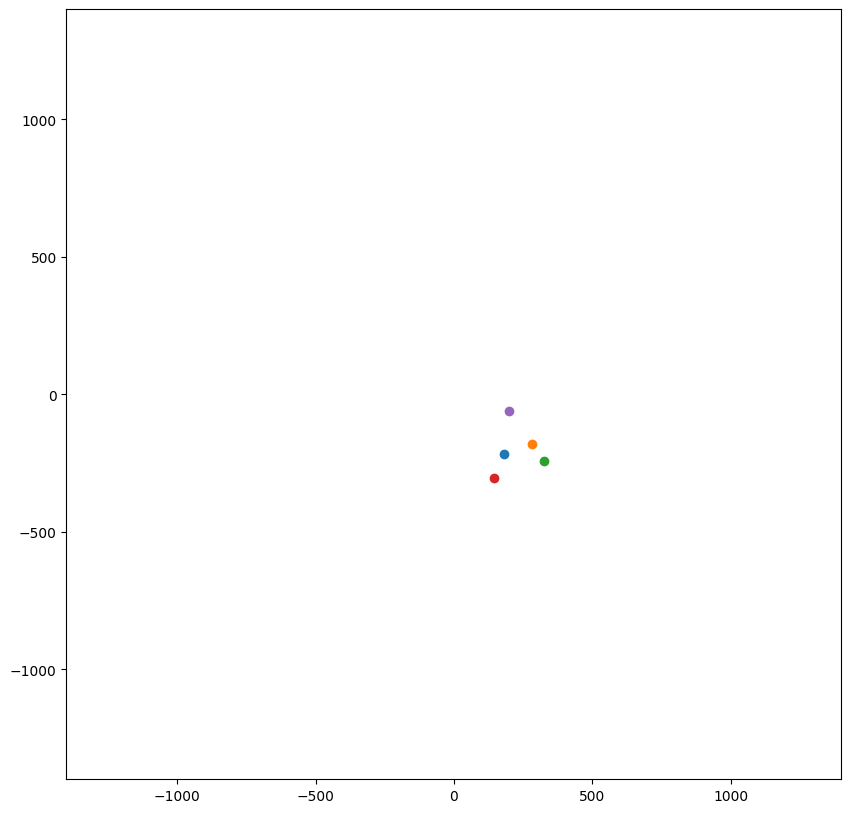

In [43]:
fig = plt.figure(figsize=(10,10))
ax = plt.axes()
ax.set_xlim([-1400,1400])
ax.set_ylim([-1400,1400])

muonTopTop = [252,254]
muonTop = [253,238]
muonBottom = [237,236]

for event in simTripleEvents:
    eventNumber = event[0]
    paddles = event[1]
    for vector in zip(trackingPosX[eventNumber], trackingPosY[eventNumber], trackingPosZ[eventNumber], trackingParticle[eventNumber]):
        if ((vector[3] == -13) or (vector[3] == 13)) and (paddles == [252,253,236]):
            #print(vector[0][0])
            plt.scatter(vector[0][0],vector[1][0])
            print(vector[2][0])

# Calculating the efficiency curve (1st method)

Loading data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 1262.20it/s]


52018
[1.0, 0.9227575070168019, 0.8282133107770387, 0.8088354031296858, 0.7977815371602138, 0.7878811180745127, 0.7785189742012381, 0.7696758814256603, 0.7624476142873621, 0.7547387442808259, 0.7478757353223884, 0.7412818639701642, 0.7351493713714483, 0.7285555000192241, 0.7224806797646969, 0.7176746510823176, 0.7132338805797993, 0.708350955438502, 0.7045830289515168, 0.7013533776769579, 0.6972586412395709, 0.69450959283325, 0.6913568380176093, 0.6880887385135914, 0.6852627936483525, 0.6825714175862202, 0.6794186627705794, 0.676535045561152, 0.6736322042369949, 0.6712868622399939, 0.6685185897189434, 0.6656157483947864, 0.6621746318582029, 0.6599254104348494, 0.6583490330270291, 0.6561190357184051, 0.6536391249182976, 0.6515436964127802, 0.6493905955630743, 0.647814218155254, 0.6457764619939251, 0.6430466377023338, 0.6414318120650544, 0.6391056941827828, 0.6366065592679457, 0.635280095351609, 0.6337229420585182, 0.6316659617824599, 0.6302818255219347, 0.6280902764427698, 0.625668037986

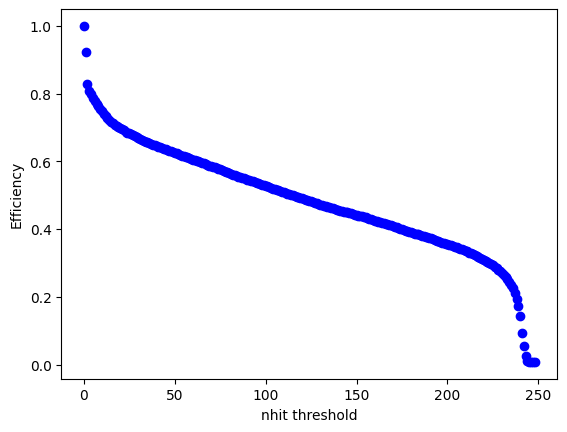

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [75]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 
import Waveform_Analysis.PMT_POSITIONS as pmtpos
from ipywidgets import IntProgress
from IPython.display import display
from multiprocessing import Pool
import numpy as np
import tqdm

fileList = [
    #"/mnt/data/eos/simulations/eos_efficiency_test/eos_1nhit/eos_1nhit.root",
    #"/mnt/data/eos/simulations/eos_sky_10k_all_muon_paddles/eos_sky_10k_all_muon_paddles_0.root",
    #"/mnt/data/eos/simulations/eos_sky_100k_muon_paddles/eos_sky_100k_muon_paddles.root",
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_1nhit/eos_1nhit_0.root",
]
data = []

print("Loading data")
for file in tqdm.tqdm(fileList):
    data.append(ROOT.RDataFrame("output", file))

nhits = data[0].AsNumpy(columns=["nhits"])["nhits"]
singlehitPMTID = data[0].AsNumpy(columns=["hitPMTID"])["hitPMTID"]

counts = []

total_first = 0

# for threshold in range(1,250):
#     total_events = 0
    
#     for event in singlehitPMTID:
#         if len(event) >= threshold:
#             total_events = total_events + 1

#     if threshold == 1:
#         total_first = total_events

#     counts.append(total_events/total_first)

# newNhits = []
# for eventhits in nhits:
#     if  (eventhits > 300) or (0 >= eventhits):
#         continue
#     newNhits.append(eventhits)

counts = []

for threshold in range(1,250):
    totalHits = 0
    for event in nhits:
        if event >= threshold:
            totalHits += 1

    if threshold == 1:
        total_first = totalHits
        
    counts.append(totalHits/total_first)
    

print(total_first)
print(counts)
plt.plot(counts,'bo')
plt.xlabel("nhit threshold")
plt.ylabel("Efficiency")
plt.show()
# plt.hist(newNhits, bins=100)
# plt.xlim([0,250])
# plt.show()

Loading data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 1687.17it/s]


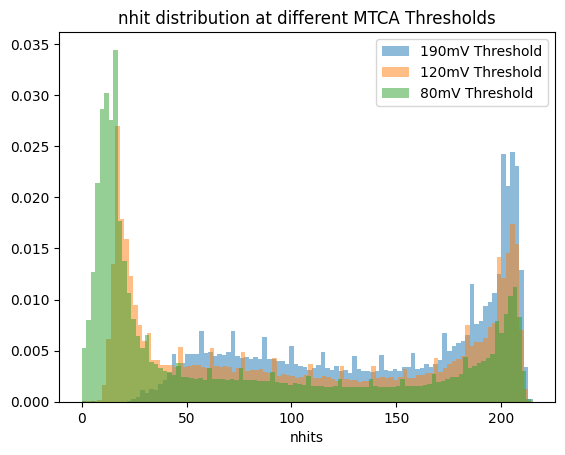

In [101]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 
import Waveform_Analysis.PMT_POSITIONS as pmtpos
from ipywidgets import IntProgress
from IPython.display import display
from multiprocessing import Pool
import numpy as np
import tqdm

fileList = [
    #"/mnt/data/eos/run408/run408.root",
    "/mnt/data/eos/run312/run312.root",
    "/mnt/data/eos/run357/run357.root",
    "/mnt/data/eos/run321/run321.root",
]

thresholds = [190, 120, 80]

data = []

print("Loading data")
for file in tqdm.tqdm(fileList):
    data.append(ROOT.RDataFrame("events", file))

nhits = []
hitPMTs = []

for dataset in data:
    nhits.append(dataset.AsNumpy(columns=["nhit"])["nhit"])
    #hitPMTs.append(dataset.AsNumpy(columns=["hitPMTID"])["hitPMTID"])

for nhit, threshold in zip(nhits, thresholds):
    plt.hist(nhit, label=str(threshold) + "mV Threshold", bins=100,density=True, alpha=.5) 

plt.legend()
plt.title("nhit distribution at different MTCA Thresholds")
plt.xlabel("nhits")
plt.show()

Loading data


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 1854.74it/s]


1 51757
51609
10 50424
50152
20 49713
49435
30 49612
49255
40 49473
49153


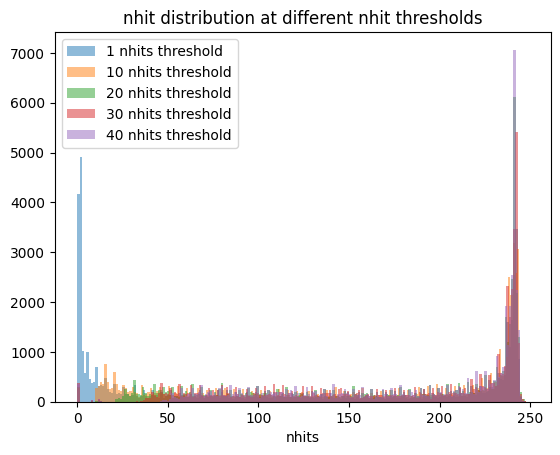

[(1, 0.9971404834128716), (10, 0.9689897018760747), (20, 0.9551365032749193), (30, 0.9516587128311146), (40, 0.9496879649129586)]


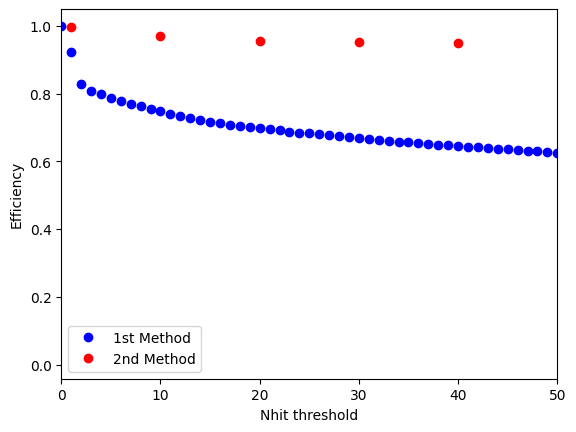

Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >
Error in <TInterpreter::TCling::AutoLoad>: failure loading library libRATDict.so for vector<vector<int> >


In [102]:
import ROOT
import matplotlib.pyplot as plt
import math
from matplotlib.patches import Patch 
import Waveform_Analysis.PMT_POSITIONS as pmtpos
from ipywidgets import IntProgress
from IPython.display import display
from multiprocessing import Pool
import numpy as np
import tqdm

fileList = [
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_1nhit/eos_1nhit_0.root",
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_10nhit/eos_10nhit_0.root",
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_20nhit/eos_20nhit.root",
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_30nhit/eos_30nhit.root",
    "/mnt/data/eos/simulations/eos_efficiency_test/eos_40nhit/eos_40nhit.root",
]

thresholds = [1,10,20,30,40]

data = []

print("Loading data")
for file in tqdm.tqdm(fileList):
    data.append(ROOT.RDataFrame("output", file))

nhits = []
hitPMTs = []

for dataset in data:
    nhits.append(dataset.AsNumpy(columns=["nhits"])["nhits"])
    hitPMTs.append(dataset.AsNumpy(columns=["hitPMTID"])["hitPMTID"])

processedNhits = []

#print(nhits)

for dataset in nhits:
    tmparr = []
    for nhit in dataset:
        if  (nhit > 300) or (0 > nhit):
            continue
        tmparr.append(nhit)

    processedNhits.append(tmparr)

efficiency = []

#print(processedNhits[0])

total_events = len(processedNhits[0])
#print(processedNhits[1])

for dataset, threshold in zip(processedNhits, thresholds):

    ### Calculating the efficiency
    print(threshold, len(dataset))
    count = 0
    for nhit in dataset:
        if  (nhit > 300) or (0 >= nhit):
            continue
        count += 1

    print(count)
    efficiency.append((threshold,count/total_events))
    
    plt.hist(dataset, bins=200, label=str(threshold)+" nhits threshold", alpha=0.5)
    #plt.show()
    #plt.xlim([0,50])

plt.legend()
plt.title("nhit distribution at different nhit thresholds")
plt.xlabel("nhits")
plt.show()

print(efficiency)

plt.plot(counts,'bo', label="1st Method")
x, y = zip(*efficiency)
plt.plot(x,y,'ro', label="2nd Method")
plt.legend()
plt.xlim([0,50])
plt.xlabel("Nhit threshold")
plt.ylabel("Efficiency")
plt.show()